# Spooky Authors Dataset

https://www.kaggle.com/c/spooky-author-identification/overview

## Data Loading

In [1]:
import pandas as pd

TRAIN = 'data/train.csv'
TEST = 'data/test.csv'
SAMPLE = 'data/sample_submission.csv'

train = pd.read_csv(TRAIN)
train.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [7]:
train['label'] = pd.get_dummies(train.author).values.tolist()
train.head()

,id,text,author,label
0,id26305,"This process, however, afforded me no means of...",EAP,"[1, 0, 0]"
1,id17569,It never once occurred to me that the fumbling...,HPL,"[0, 1, 0]"
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,"[1, 0, 0]"
3,id27763,How lovely is spring As we looked from Windsor...,MWS,"[0, 0, 1]"
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,"[0, 1, 0]"


## Class Imbalance

In [35]:
names = []
values = []
for author in train.author.unique():
    names.append(author)
    values.append((train.author == author).sum())
    print(names[-1], values[-1])
    

EAP 7900
HPL 5635
MWS 6044


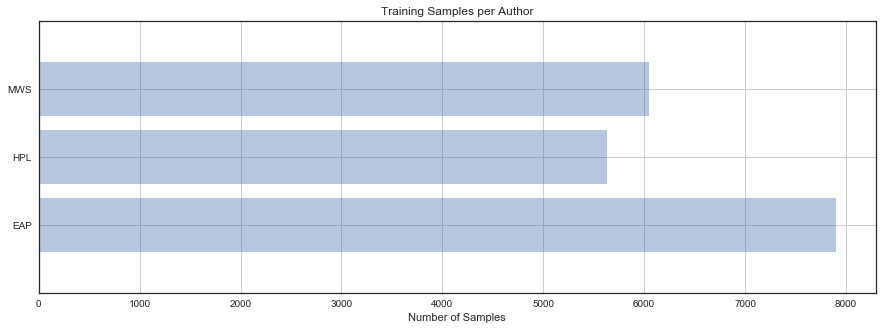

In [36]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='white')

plt.figure(figsize=(15,5))
y_pos = np.arange(1, len(values)+1)
plt.barh(y_pos, values, align='center', alpha=0.4)
plt.yticks(y_pos, names)
plt.xlabel('Number of Samples')
plt.title('Training Samples per Author')
plt.ylim(0, len(values)+1)
plt.grid(True)
plt.show()

## Word Frequencies

In [37]:
corpus = []


'This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.'

In [43]:
import re

review = re.sub('[^a-zA-Z0-9]', ' ', train.text[0]).lower().split()

print(review)

['this', 'process', 'however', 'afforded', 'me', 'no', 'means', 'of', 'ascertaining', 'the', 'dimensions', 'of', 'my', 'dungeon', 'as', 'i', 'might', 'make', 'its', 'circuit', 'and', 'return', 'to', 'the', 'point', 'whence', 'i', 'set', 'out', 'without', 'being', 'aware', 'of', 'the', 'fact', 'so', 'perfectly', 'uniform', 'seemed', 'the', 'wall']


In [48]:
import nltk
from nltk.corpus import stopwords

def get_stopwords(language):
    try:
        return set(stopwords.words(language))
    except LookupError:
        nltk.download('stopwords')
        return set(stopwords.words(language))


In [49]:
english_sw = get_stopwords('english')

review = [word for word in review if not word in english_sw]

print(review)

['process', 'however', 'afforded', 'means', 'ascertaining', 'dimensions', 'dungeon', 'might', 'make', 'circuit', 'return', 'point', 'whence', 'set', 'without', 'aware', 'fact', 'perfectly', 'uniform', 'seemed', 'wall']
